### Pair V
# Normalización

In [1]:
# Tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para EDA
# ============================================
import sidetable as stb

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral", 20)

# Para poder ver todas las columnas del dataframe
pd.options.display.max_columns = None 

# Para la gestión de los warning
# ======================
import warnings
warnings.filterwarnings('ignore')

# Para testear estadísticos
from scipy import stats 
from scipy.stats import skew   #asimetría
from scipy.stats import kurtosistest    #curtosis 

# Transformación de los datos
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste.
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings.

In [2]:
df = pd.read_pickle("../data/cost_of_living_pair1_limpio.pkl")
df.head(2)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01


```Comprobamos la normalidad de la variable respuesta```

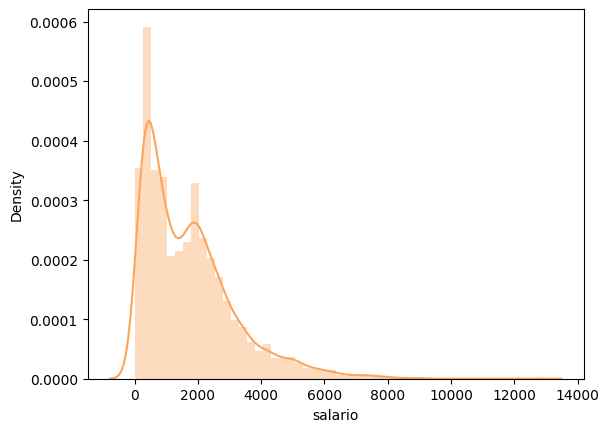

In [3]:
sns.distplot(df["salario"], color= qualitative_colors[5]);

In [4]:
stats.shapiro(df["salario"])

ShapiroResult(statistic=0.8780022859573364, pvalue=0.0)

Vemos que tiene sesgo a la derecha por lo que utilizaremos el método de raíz cuadrada para normalizar el p- valor de la variable respuesta.

Si se aplica sobre datos sesgados a la izquierda, hará que los datos sean aún más sesgados. Pero nuestro sesgo es hacia la derecha.

```Raíz cuadrada```

In [5]:
df["salario_raiz"] = df["salario"].apply(lambda x: math.sqrt(x))

In [6]:
df.head(2)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_raiz
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,24.214665
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,37.186422


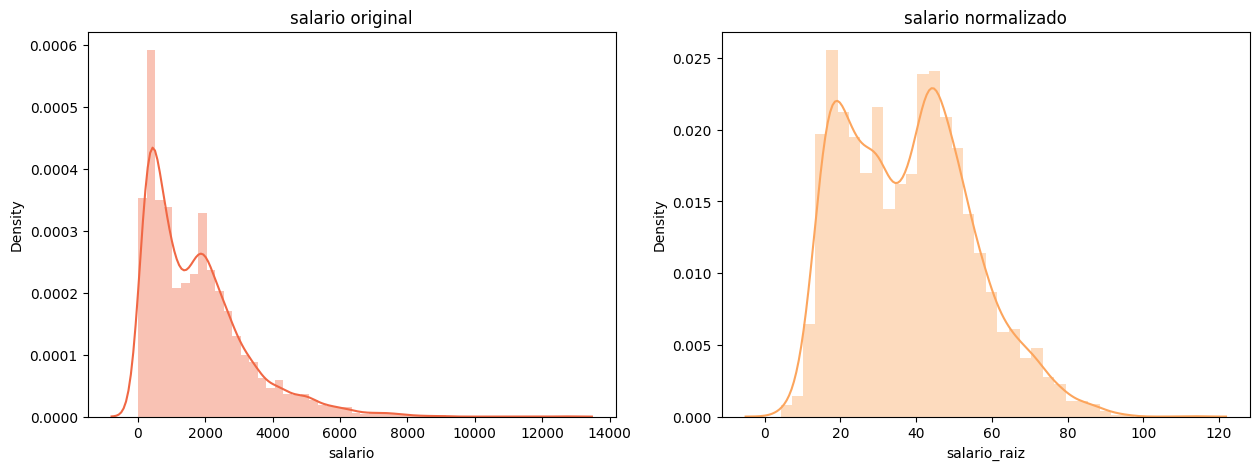

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('salario original')
axes[1].set_title('salario normalizado')

sns.distplot(df["salario"] ,ax = axes[0], color= qualitative_colors[3])
sns.distplot(df["salario_raiz"], ax = axes[1], color= qualitative_colors[5]);

In [8]:
stats.shapiro(df["salario_raiz"])

ShapiroResult(statistic=0.9713131189346313, pvalue=3.5601887072846005e-30)

Después de comprobar con el test shapiro, vemos que seguimos teniendo un p-valor < 0.05, es decir, siegue siendo no normal, a pesar de haberse transformado  el valor. Por este motivo, vamos a realizar el método Box-Cox:

```Box-Cox```

In [9]:
df['salario_box'], lambda_ajustada = stats.boxcox(df['salario'])

In [10]:
lambda_ajustada

0.22342264511238108

In [11]:
df.head(2)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_raiz,salario_box
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,24.214665,14.116848
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,37.186422,18.045386


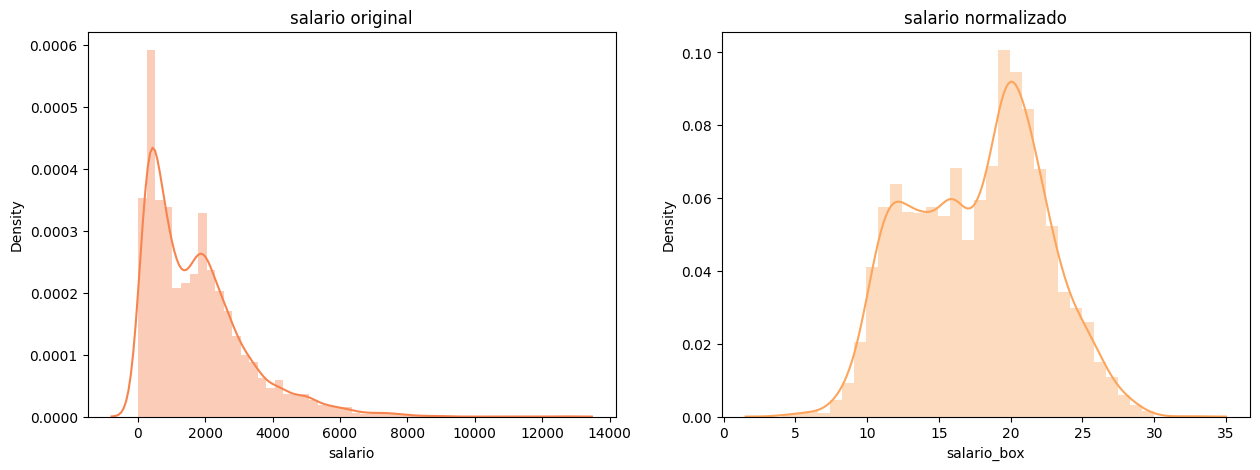

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('salario original')
axes[1].set_title('salario normalizado')

sns.distplot(df['salario'] ,ax = axes[0], color= qualitative_colors[4])
sns.distplot(df['salario_box'], ax = axes[1], color= qualitative_colors[5])
plt.savefig("../graficas/05_normalizacion_distplot_box_cox.png");

In [15]:
stats.shapiro(df["salario_box"])

ShapiroResult(statistic=0.9844740033149719, pvalue=9.785771566523614e-23)

Ha funcionado un poco más, pero el p-valor sigue siendo < 0.05. 
Vamos a comprobar la normalización con el método logarítmico, a pesar de que la curvatura de nuestra gráfica no se adecúa para usar este método.

```Logarítmica```

In [16]:
# logarítmica - lambda para evitar errores por posible valor 0 en los datos
df["salario_log"] = df["salario"].apply(lambda x: np.log(x) if x > 0 else 0)
df.head()

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_raiz,salario_box,salario_log
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.770,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,24.214665,14.116848,6.373917
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.950,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,37.186422,18.045386,7.231887
2,Jakarta,Indonesia,Asia,483.19,2.548571,6.5800,1.650,9.430000,54.5075,21.285,3.18,2.22,132.74,2.662,0.79,26734.235,30.45,0.11,80.12,613.7650,1981.745,9.15,21.981583,13.330144,6.180410
3,Manila,Philippines,Asia,419.02,2.475000,3.0475,1.498,11.493333,49.1750,26.970,5.48,2.65,254.89,3.092,1.38,20592.315,38.02,0.15,97.45,820.1275,3066.240,7.80,20.469978,12.772205,6.037919
4,Seoul,South Korea,Asia,2672.23,7.647857,5.1825,2.728,21.986667,70.2475,36.415,9.42,3.39,384.01,11.052,1.41,27749.865,22.06,0.16,176.24,1424.5550,16340.420,3.47,51.693617,21.616578,7.890669


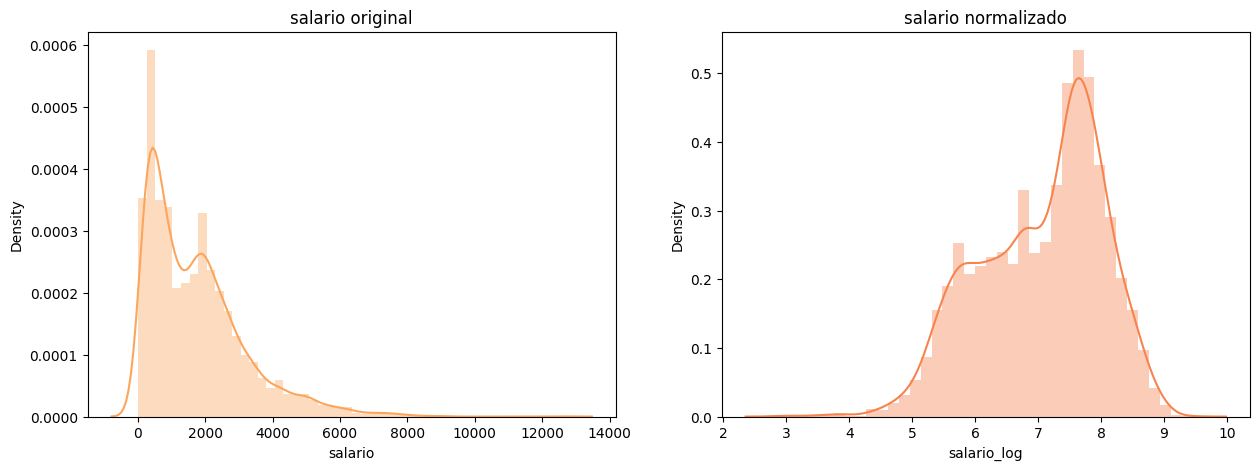

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('salario original')
axes[1].set_title('salario normalizado')

sns.distplot(df['salario'] ,ax = axes[0], color= qualitative_colors[5])
sns.distplot(df['salario_log'], ax = axes[1], color= qualitative_colors[4]);

In [18]:
stats.shapiro(df["salario_log"])

ShapiroResult(statistic=0.9694636464118958, pvalue=5.393225445696975e-31)

El p-valor sigue siendo < 0.05, los datos siguen siendo no normales. Por lo que vamos a aplicar el Sklearn.MinMaxScaller:

```Sklearn.MinMaxScaller```

In [19]:
numericas = df.select_dtypes(include = np.number)

In [20]:
minmax = MinMaxScaler()

In [21]:
minmax.fit(df[['salario']])

MinMaxScaler()

In [22]:
X_normalizadas = minmax.transform(df[["salario"]])

In [23]:
X_normalizadas.min(axis=0)

array([0.])

In [24]:
X_normalizadas.max(axis=0)

array([1.])

In [25]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["salario_Sklearn"])
numericas_minmax.head(2)

,salario_Sklearn
0,0.044882
1,0.107779


In [26]:
df["salario_Sklearn"] = numericas_minmax
df.head(2)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_raiz,salario_box,salario_log,salario_Sklearn
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,24.214665,14.116848,6.373917,0.044882
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,37.186422,18.045386,7.231887,0.107779


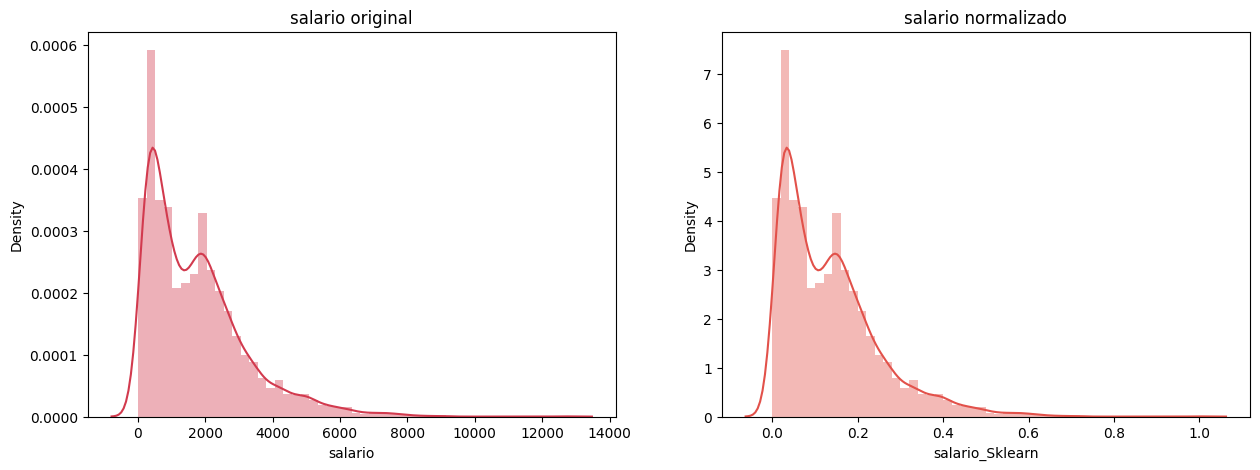

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('salario original')
axes[1].set_title('salario normalizado')

sns.distplot(df['salario'] ,ax = axes[0], color= qualitative_colors[1])
sns.distplot(df['salario_Sklearn'], ax = axes[1], color= qualitative_colors[2]);

In [28]:
stats.shapiro(df["salario_Sklearn"])

ShapiroResult(statistic=0.8780022859573364, pvalue=0.0)

Con este método hemos encontrado la misma forma en la gráfica, pero el p-valor nos da 0.0 como el original.

Después de haber probado todas las aproximaciones, podemos concluir que con ninguna de las transformaciones hemos cumplido nuestro objetivo de normalizar nuestros datos. 

In [29]:
df.head(2)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_raiz,salario_box,salario_log,salario_Sklearn
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,24.214665,14.116848,6.373917,0.044882
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,37.186422,18.045386,7.231887,0.107779


A pesar de que ningún método nos ha funcionado, nos quedamos  con la columna nueva "salario_box" para trabajar en los próximos pairs y las restantes nuevas las eliminamos.

In [30]:
df.drop(["salario_raiz",  "salario_log", "salario_Sklearn"], axis = 1, inplace = True)

In [31]:
df.to_pickle("../data/5_normalizacion.pkl")